# Volcano plots of DESeq data
using data generated from DESeq and the meta features counts matrix (generated from featureCounts)

data filters from DESeq:
- lfc_shrink = normal
- lfcThreshold = 0.25
- cooksCutoff = FALSE
- independentFiltering = FALSE

(so only genes with an adjusted p-value of NA are those with low gene counts)

In [3]:
# loading required packages
library(tidyverse)
library(dplyr)
library(ggpubr)
library(ggh4x)

## Phase 1 warm vs. control

now looking at ggplot but faceting by plot

looking at phase 1 warm vs. control and hypoxia vs. control

question - do we need to shrink for volcano plot? or do we only need to shrink for 

In [4]:
phase1 <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/volcano_data/phase1_wc_genes.csv')
head(phase1)

Warning message in file(file, "rt"):
“cannot open file '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/volcano_data/phase1_wc_genes.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
phase1$exposure <- 'First Exposure'
head(phase1)

In [ ]:
# Allows me to change the name of the facet grid
grid_names <- c(`hypoxic_vs_control` = "Control vs. Hypoxia",
                    `warm_vs_control` = "Control vs. Warm")

In [ ]:
options(repr.plot.width=15, repr.plot.height=5)

volcano_plot_p1 <- ggplot(data = phase1, aes(x = log2FoldChange, y = -log10(padj), col = more_me_in)) +
geom_vline(xintercept = c(-0.5,0.5), col = "gray", linetype = 'dashed') + # fold change threshold line
facet_nested(~exposure + plot, labeller = as_labeller(grid_names),  nest_line = TRUE,) +
geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') + # padj threshold line
geom_point(size=4, alpha = 0.4) +
scale_color_manual(values = c('lightgreen','gray','hotpink1', 'purple')) + 
theme_light(base_size=20) + 
theme(strip.text = element_text(color='black', face='bold'), 
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.background = element_rect('transparent')) + 
labs(col='More methylation\nin first exposure:', x = expression("log"[2]*"FoldChange"), y = expression("-log"[10]*"padj")) +
scale_x_continuous(limits = c(-4,4))

volcano_plot_p1

In [ ]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('volcano_p1wc_hc.pdf', width=15, height=5)

# open plot
volcano_plot_p1

# close pdf file
dev.off()

now doing the same thing for CE of hypoxia

# **Effects of Phase 2, Given Phase 1**
in other words - looking at:
- phase 1 = control, phase 2 = hypoxia or control
- phase 2 = hypoxia, phase 2 = hypoxia or control

starting with **phase 1 = *control*** first

### faceting by first exposure

now looking at ggplot but faceting by phase 1

looking at phase 1 hypoxia or control CE

In [5]:
ce_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/volcano_data/phase1_ce_genes.csv')
head(ce_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,phase1,more_me_in
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111120752,0.2502286,-0.01831450,0.1324564,0.00000000,1.0000000,1,control,not significant
2,LOC111109452,0.6276346,-0.06431818,0.1758236,0.00000000,1.0000000,1,control,not significant
3,LOC111124802,143.4993752,0.01425287,0.1425472,0.00000000,1.0000000,1,control,not significant
4,LOC111101273,54.3974633,-0.25915086,0.1971998,-0.04640401,0.9629882,1,control,not significant
5,LOC111101250,88.6108831,0.06661223,0.1889832,0.00000000,1.0000000,1,control,not significant
6,LOC111101262,182.2669054,0.15981376,0.1181916,0.00000000,1.0000000,1,control,not significant


In [6]:
# Allows me to change the name of the facet grid
grid_names <- c(`control` = "Control",
                    `hypoxic` = "Hypoxic")

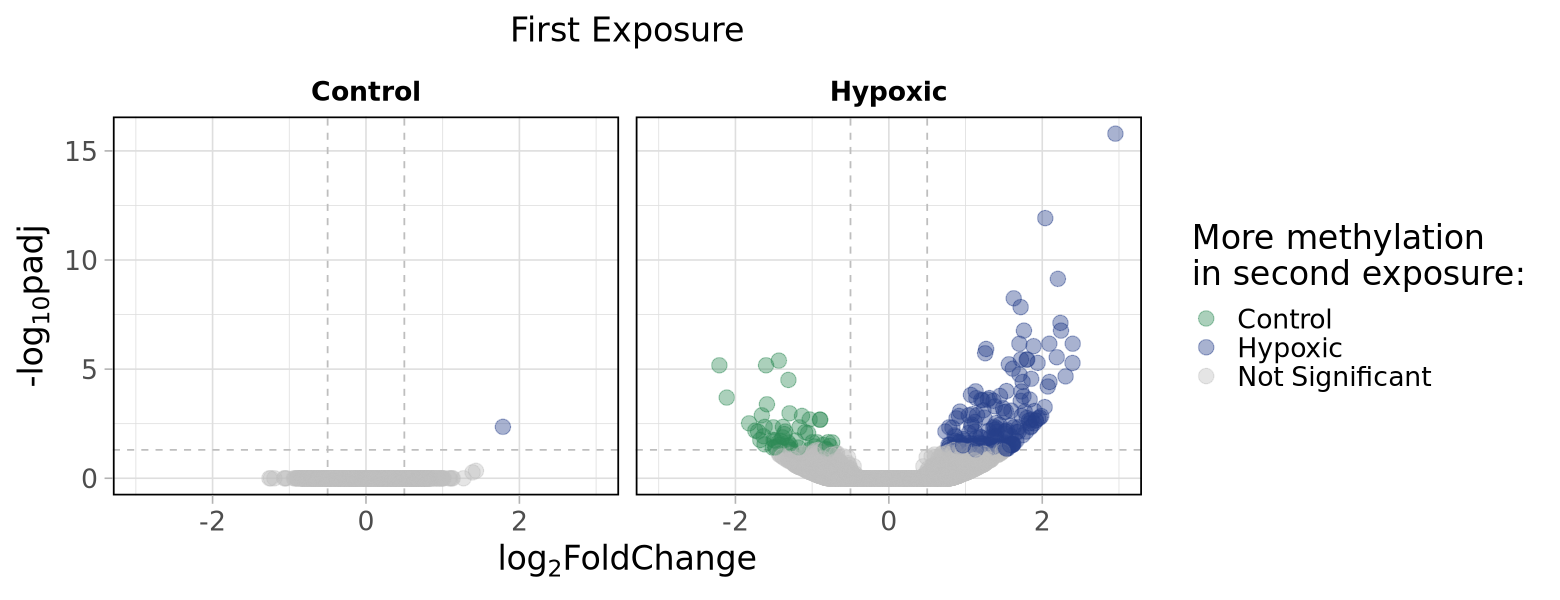

In [7]:
# changes size of plots
options(repr.plot.width=13, repr.plot.height=5)

# ggplot volcano plot
volcano_ce <- ggplot(data = ce_df, aes(x = log2FoldChange, 
                                       y = -log10(padj), 
                                       col = more_me_in)) +
geom_vline(xintercept = c(-0.5,0.5), 
           col = "gray", 
           linetype = 'dashed') + # fold change threshold line
facet_grid(~phase1, labeller = as_labeller(grid_names)) +
geom_hline(yintercept = -log10(0.05), 
           col = "gray", 
           linetype = 'dashed') + # padj threshold line
geom_point(size=4, alpha = 0.4) +
scale_color_manual(values = c('seagreen4','royalblue4', 'gray'), 
                   labels=c('Control', 'Hypoxic', 'Not Significant')) + 
theme_light(base_size=20) + 
theme(strip.text = element_text(color='black', face = 'bold'), 
      strip.background = element_rect('transparent'),
      plot.subtitle=element_text(hjust=0.5),
     panel.border = element_rect(color = 'black', fill = NA, linewidth = 1)) + 
labs(subtitle = 'First Exposure',
     col='More methylation\nin second exposure:', 
     x = expression("log"[2]*"FoldChange"), 
     y = expression("-log"[10]*"padj")) +
scale_x_continuous(limits = c(-3,3))

volcano_ce

In [8]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('volcano_ce.pdf', width=13, height=5)

# open plot
volcano_ce

# close pdf file
dev.off()

png 
  2

# **Effects of phase 1, given phase 2**
looking at samples that are:
- phase 1 = hypoxic or control, phase 2 = hypoxic
- phase 1 = hypoxic or control, phase 2 = control

starting with **phase 2 = control**

### faceting by second exposure

In [9]:
p2_ce_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/volcano_data/phase2_ce_genes.csv')
head(p2_ce_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,phase2,more_me_in
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111124802,226.12353,0.08476869,0.1166682,0.0000000,1.000000e+00,1.00000000,control,not significant
2,LOC111101273,85.74145,-0.19260342,0.1756082,0.0000000,1.000000e+00,1.00000000,control,not significant
3,LOC111101250,128.84046,-0.10155347,0.1388992,0.0000000,1.000000e+00,1.00000000,control,not significant
4,LOC111101262,272.87639,0.16866172,0.1088131,0.0000000,1.000000e+00,1.00000000,control,not significant
5,LOC111133260,19.42014,-1.40066204,0.2815758,-4.0865094,4.379118e-05,0.03210292,control,control
6,LOC111113503,16.76014,0.36122234,0.3048477,0.3648456,7.152266e-01,1.00000000,control,not significant


In [10]:
# Allows me to change the name of the facet grid
grid_names <- c(`control` = "Control",
                    `hypoxic` = "Hypoxic")

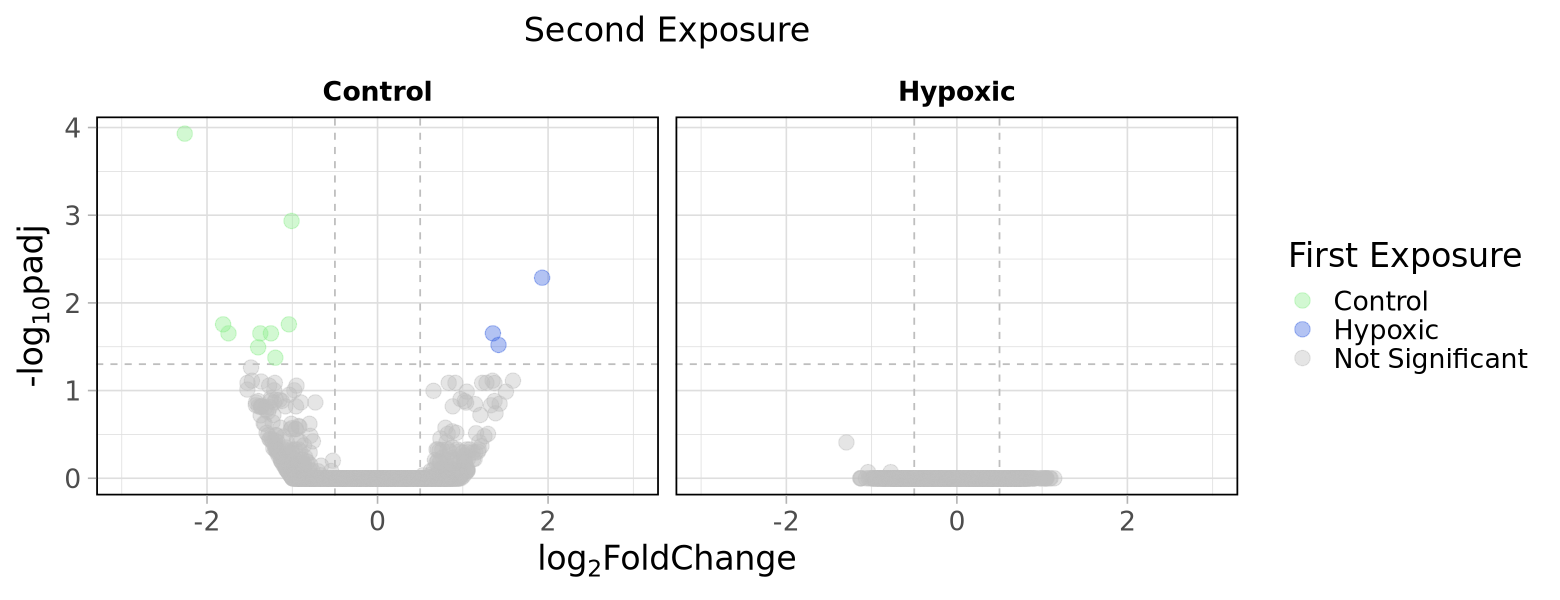

In [11]:
# changing size of plot
options(repr.plot.width=13, repr.plot.height=5)

# ggplot volcano plot
volcano_p2_ce <- ggplot(data = p2_ce_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = more_me_in)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        facet_grid(~phase2, labeller = as_labeller(grid_names)) +
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('lightgreen','royalblue', 'gray'),
                                           labels=c('Control', 'Hypoxic', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        theme(strip.text = element_text(color='black', face = 'bold'), 
                              strip.background = element_rect('transparent'),
                              panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
                              plot.subtitle=element_text(hjust=0.5)) + 
                        labs(subtitle = 'Second Exposure',
                             col='First Exposure', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_p2_ce

In [12]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('volcano_p2_ce.pdf', width=13, height=5)

# open plot
volcano_p2_ce

# close pdf file
dev.off()

png 
  2

# **Effects of phase 2 hypoxia vs. control - ignoring phase 1**


In [13]:
p2_ch <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p2_ch.csv')
head(p2_ch)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111120752,0.3456118,-0.17049899,0.21650804,0,1,NA
2,LOC111109452,1.5973302,0.17659462,0.22076809,0,1,1
3,LOC111124802,213.0013054,-0.02461241,0.08062880,0,1,1
4,LOC111101273,76.7130208,-0.14762283,0.11345236,0,1,1
5,LOC111101250,123.4748149,0.02005474,0.13086861,0,1,1
6,LOC111101262,269.4443993,0.03410497,0.08789241,0,1,1


In [14]:
p2_ch <- na.omit(p2_ch)
head(p2_ch)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,LOC111109452,1.59733,0.17659462,0.22076809,0.000000,1.00000000,1.0000000
3,LOC111124802,213.00131,-0.02461241,0.08062880,0.000000,1.00000000,1.0000000
4,LOC111101273,76.71302,-0.14762283,0.11345236,0.000000,1.00000000,1.0000000
5,LOC111101250,123.47481,0.02005474,0.13086861,0.000000,1.00000000,1.0000000
6,LOC111101262,269.44440,0.03410497,0.08789241,0.000000,1.00000000,1.0000000
7,LOC111133260,29.44709,0.85796702,0.24894180,2.442205,0.01459784,0.7130152


In [15]:
p2_ch$log2FoldChange <- as.numeric(p2_ch$log2FoldChange)
p2_ch$more_me_in <- ifelse(p2_ch$log2FoldChange<0 & p2_ch$padj < 0.05, "control", #neg ES = pathway for control
                        ifelse(p2_ch$log2FoldChange>0 & p2_ch$padj < 0.05, "hypoxic", # pos ES = pathway for warm
                               "not significant"))

In [16]:
unique(p2_ch$more_me_in)

[1] "not significant" "hypoxic"         "control"

In [17]:
# Allows me to change the name of the facet grid
grid_names <- c(`control` = "Control",
                    `hypoxic` = "Hypoxic")

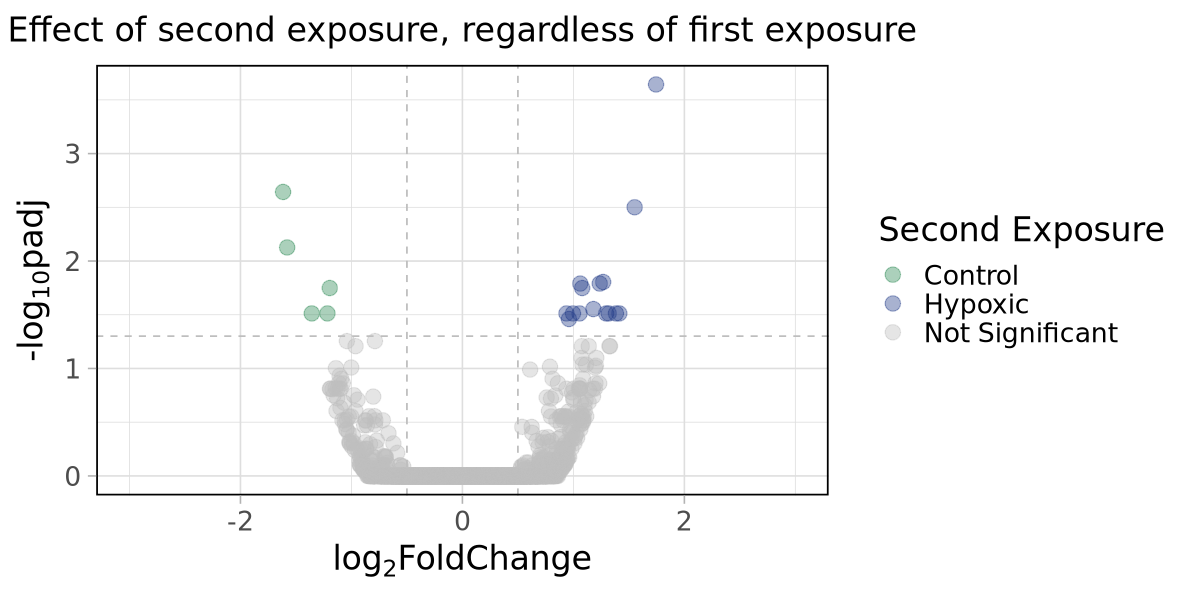

In [18]:
# changing size of plot
options(repr.plot.width=10, repr.plot.height=5)


# ggplot volcano plot
volcano_p2_ce <- ggplot(data = p2_ch, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = more_me_in)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        #facet_grid(~phase2, labeller = as_labeller(grid_names)) +
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('Control', 'Hypoxic', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        theme(strip.text = element_text(color='black', face = 'bold'), 
                              strip.background = element_rect('transparent'),
                              panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
                              plot.subtitle=element_text(hjust=0.5)) + 
                        labs(subtitle = 'Effect of second exposure, regardless of first exposure',
                             col='Second Exposure', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_p2_ce

In [19]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('volcano_p2_ce.pdf', width=13, height=5)

# open plot
volcano_p2_ce

# close pdf file
dev.off()

png 
  2

### creating new volcano plot - effects of phase 1 and effects of phase 2

In [20]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/volcano_data/phase1_phase1_only_genes.csv')

df <- select(df, X, log2FoldChange, padj,phase_effect, more_me_in)
colnames(df) <- c('gene','lfc','padj','phase_effect','more_me_in')

df <- na.omit(df)

head(df)

,gene,lfc,padj,phase_effect,more_me_in
,<chr>,<dbl>,<dbl>,<chr>,<chr>
2,LOC111109452,0.17659462,1.0000000,phase2,not significant
3,LOC111124802,-0.02461241,1.0000000,phase2,not significant
4,LOC111101273,-0.14762283,1.0000000,phase2,not significant
5,LOC111101250,0.02005474,1.0000000,phase2,not significant
6,LOC111101262,0.03410497,1.0000000,phase2,not significant
7,LOC111133260,0.85796702,0.7130152,phase2,not significant


In [21]:
unique(df$more_me_in)

[1] "not significant"         "second exposure hypoxic"
[3] "second exposure control"

In [22]:
# Allows me to change the name of the facet grid
grid_names <- c(`phase1` = "First Exposure Only",
                    `phase2` = "Second Exposure Only")

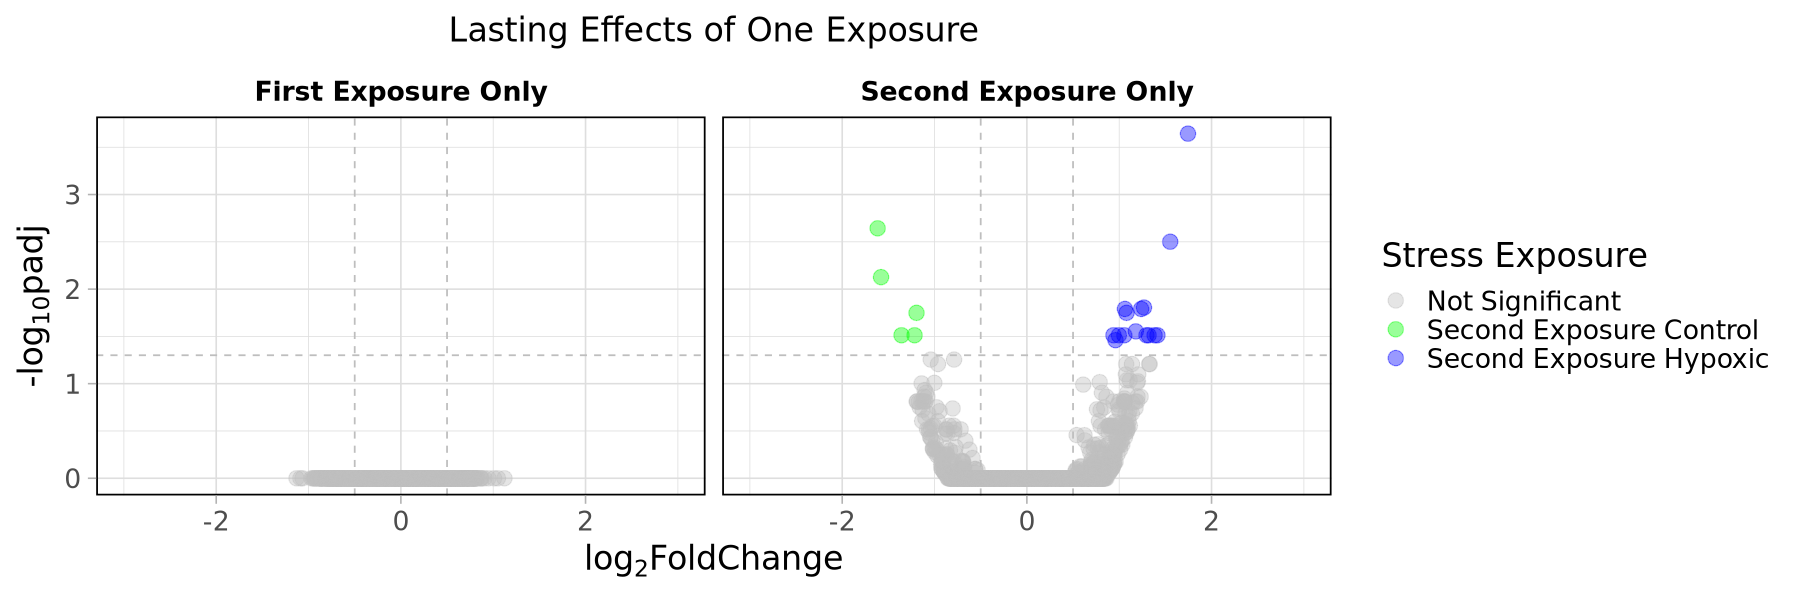

In [27]:
# changing size of plot
options(repr.plot.width=15, repr.plot.height=5)


# ggplot volcano plot
volcano_p2_ce <- ggplot(data = df, aes(x = lfc,
                                             y = -log10(padj),
                                             col = more_me_in)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        facet_grid(~phase_effect, labeller = as_labeller(grid_names)) +
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('gray','green', 'blue'),
                                           labels=c('Not Significant', 'Second Exposure Control', 'Second Exposure Hypoxic')) + 
                        theme_light(base_size=20) + 
                        theme(strip.text = element_text(color='black', face = 'bold'), 
                              strip.background = element_rect('transparent'),
                              panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
                              plot.subtitle=element_text(hjust=0.5)) + 
                        labs(subtitle = 'Lasting Effects of One Exposure',
                             col='Stress Exposure', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_p2_ce

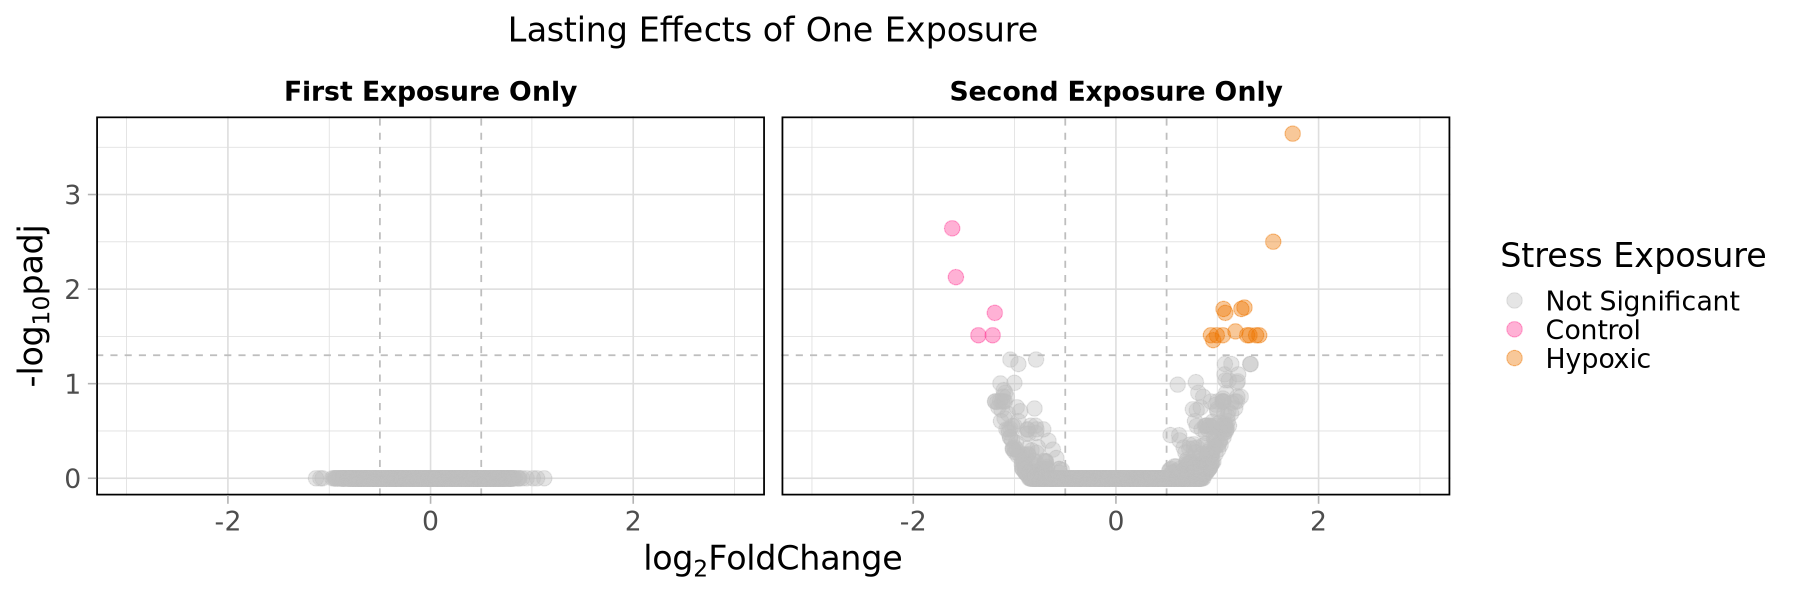

In [33]:
# changing size of plot
options(repr.plot.width=15, repr.plot.height=5)


# ggplot volcano plot
volcano_p2_ce <- ggplot(data = df, aes(x = lfc,
                                             y = -log10(padj),
                                             col = more_me_in)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        facet_grid(~phase_effect, labeller = as_labeller(grid_names)) +
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('gray','violetred1', 'darkorange2'),
                                           labels=c('Not Significant', 'Control', 'Hypoxic')) + 
                        theme_light(base_size=20) + 
                        theme(strip.text = element_text(color='black', face = 'bold'), 
                              strip.background = element_rect('transparent'),
                              panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
                              plot.subtitle=element_text(hjust=0.5)) + 
                        labs(subtitle = 'Lasting Effects of One Exposure',
                             col='Stress Exposure', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_p2_ce